## Preliminaries

In [5]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score


from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import svm


## Load Preprocessed data and target

In [26]:
X_train = np.loadtxt('data_preproc_train.txt', delimiter=',')
y_train = np.loadtxt('target_train.txt',delimiter=',')
X_test = np.loadtxt('data_preproc_test.txt',delimiter=',')

## Create Decision Tree Using Gini Impurity

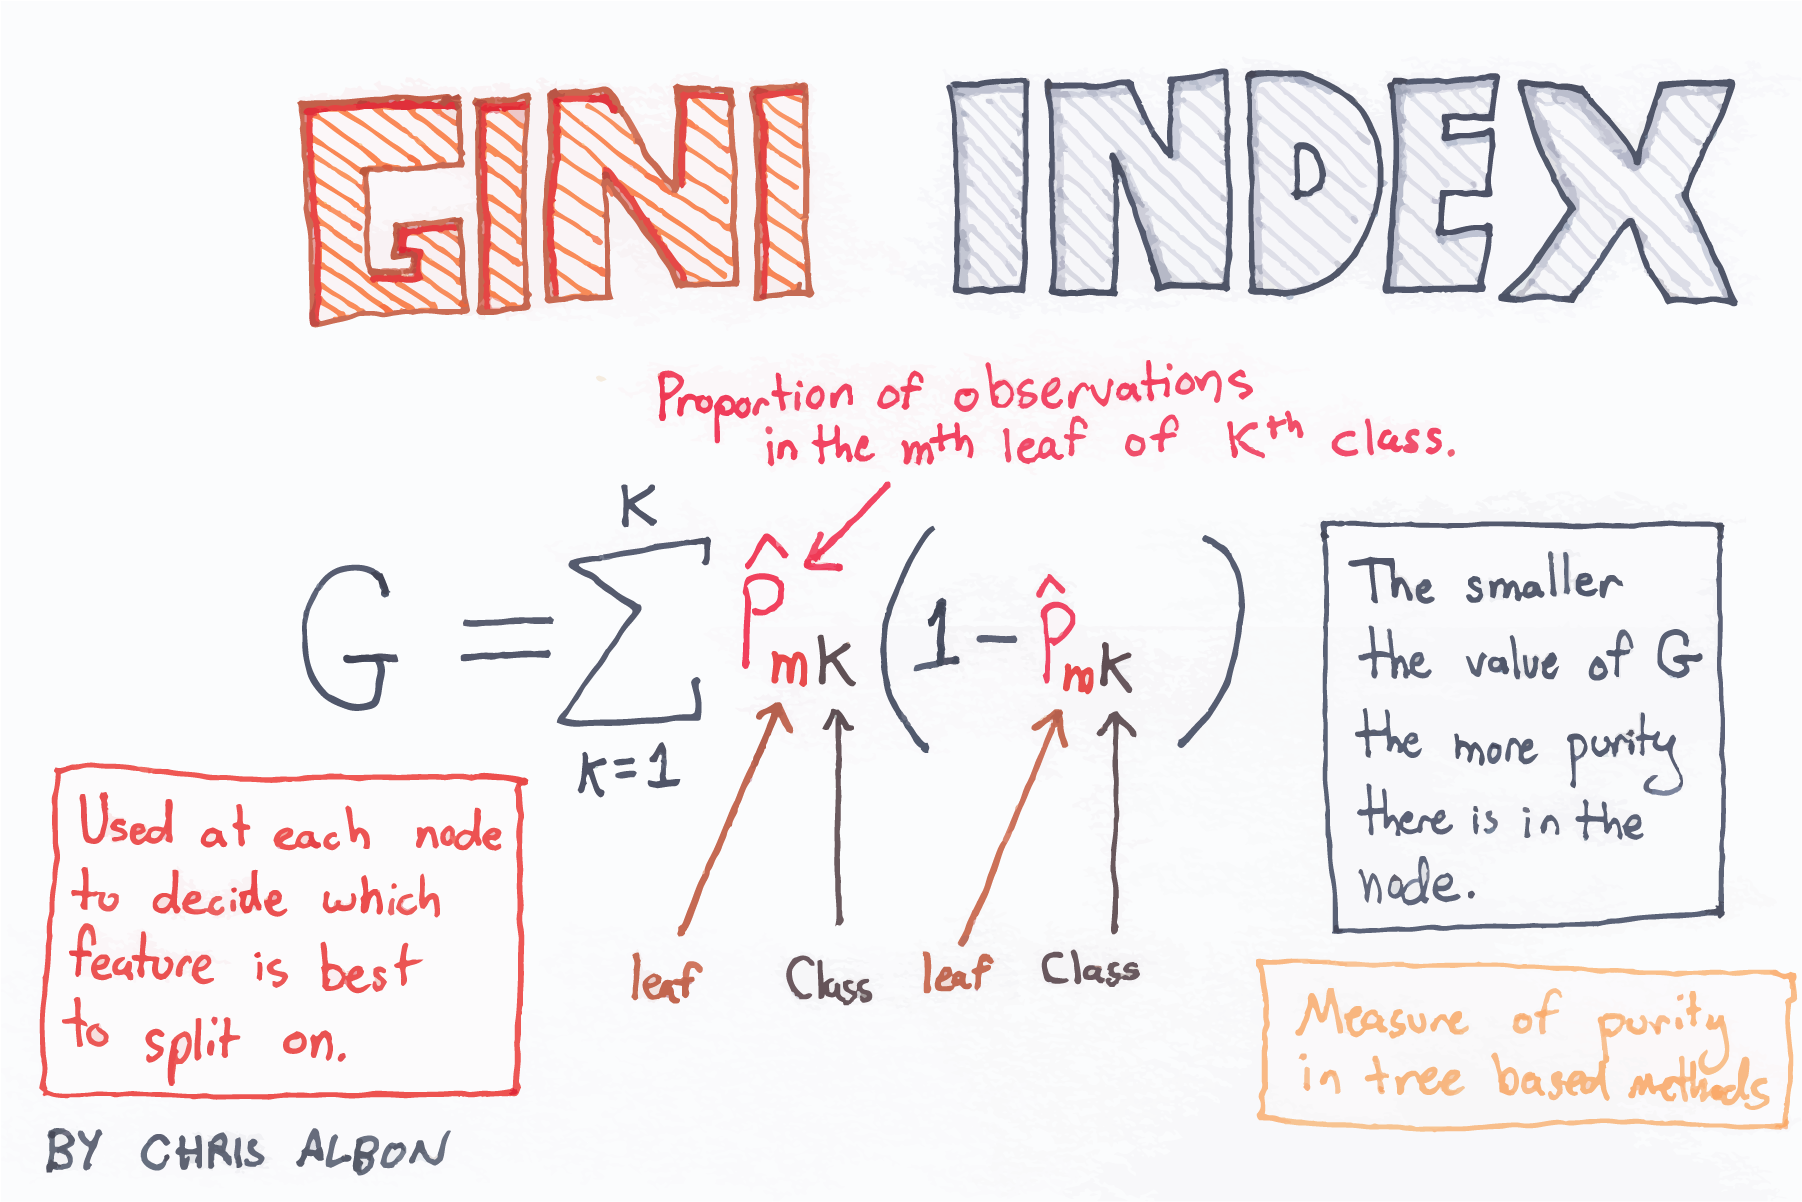

### Create Decision Tree Using Gini Impurity

In [27]:
# Create decision tree classifer object using gini
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

### Train Model

In [28]:
# Train model
model = clf.fit(X_train, y_train)

### Predict Observation

In [29]:
# Predict observation's class    
model.predict(X_test)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1.

### View Predicted Probabilities

In [30]:
# View predicted class probabilities for the three classes
model.predict_proba(X_test)
print(np.shape(model.predict(X_test)))
print(model.predict_proba(X_test))

(332,)
[[1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.83333333 0.16666667]
 [1.         0.        ]
 [0.8        0.2       ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.5        0.5       ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.333

### Create Pipeline

In [31]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
tree = clf

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, tree)

### Create k-Fold Cross-Validation

In [32]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

### Conduct k-Fold Cross-Validation

In [33]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [34]:
cv_results

array([0.83333333, 0.79166667, 0.76388889, 0.76388889, 0.67605634,
       0.78873239, 0.73239437, 0.69014085, 0.84507042, 0.78873239])

### Calculate Mean Performance Score

In [36]:
# Calculate mean
print("Mean performance score: %.2f%%" % (cv_results.mean()*100))

Mean performance score: 76.74%
